**Create a bar chart or histogram to visualize the distribution of a categorical or continuous variable in a population.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('india-districts-census-2011.csv')

In [3]:
data.shape

(640, 118)

In [4]:
data.head

<bound method NDFrame.head of      District code                   State name              District name  \
0                1            JAMMU AND KASHMIR                    Kupwara   
1                2            JAMMU AND KASHMIR                     Badgam   
2                3            JAMMU AND KASHMIR                Leh(Ladakh)   
3                4            JAMMU AND KASHMIR                     Kargil   
4                5            JAMMU AND KASHMIR                      Punch   
..             ...                          ...                        ...   
635            636                  PONDICHERRY                       Mahe   
636            637                  PONDICHERRY                   Karaikal   
637            638  ANDAMAN AND NICOBAR ISLANDS                   Nicobars   
638            639  ANDAMAN AND NICOBAR ISLANDS  North  AND Middle Andaman   
639            640  ANDAMAN AND NICOBAR ISLANDS              South Andaman   

     Population    Male  Female  

In [5]:
df_Maharashtra = data.loc[data['State name'] == 'MAHARASHTRA']
df_Gujarat = data.loc[data['State name'] == 'GUJARAT']

In [6]:
df_Maharashtra.head()

,District code,State name,District name,Population,Male,Female,Literate,Male_Literate,Female_Literate,SC,...,Power_Parity_Rs_90000_150000,Power_Parity_Rs_45000_150000,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000,Total_Power_Parity
496,497,MAHARASHTRA,Nandurbar,1648295,833170,815125,906509,512099,394410,47985,...,449,1399,144,210,354,207,224,431,0,2446
497,498,MAHARASHTRA,Dhule,2050862,1054031,996831,1293916,723388,570528,127571,...,794,1927,208,305,513,372,478,850,0,3583
498,499,MAHARASHTRA,Jalgaon,4229917,2197365,2032552,2891882,1629223,1262659,389273,...,1790,4183,471,687,1158,847,1122,1969,65,7988
499,500,MAHARASHTRA,Buldana,2586258,1337560,1248698,1879874,1048892,830982,470895,...,910,2441,262,383,645,430,499,929,0,4421
500,501,MAHARASHTRA,Akola,1813906,932334,881572,1411281,758977,652304,364059,...,871,1930,255,372,627,442,679,1121,0,3948


In [7]:
df_Gujarat.head()

,District code,State name,District name,Population,Male,Female,Literate,Male_Literate,Female_Literate,SC,...,Power_Parity_Rs_90000_150000,Power_Parity_Rs_45000_150000,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000,Total_Power_Parity
467,468,GUJARAT,Kachchh,2092371,1096737,995634,1252319,739239,513080,258859,...,1297,2026,513,277,790,219,306,525,608,4146
468,469,GUJARAT,Banas Kantha,3120506,1610379,1510127,1704923,1048402,656521,327460,...,1077,2497,205,273,478,296,388,684,103,4242
469,470,GUJARAT,Patan,1343734,694397,649337,837913,494631,343282,123408,...,584,1238,125,160,285,151,231,382,89,2199
470,471,GUJARAT,Mahesana,2035064,1056520,978544,1502645,847499,655146,162288,...,1012,2016,220,268,488,226,369,595,252,3648
471,472,GUJARAT,Sabar Kantha,2428589,1244231,1184358,1578734,918625,660109,187685,...,1082,2347,175,239,414,249,406,655,126,3934


In [8]:
# Group the data state-wise
states_group = data.groupby(by = "State name")

# List for storing tuples which contain state-name and its corresponding literacy rate
literacy_rate = []

# Iterate through each group (a group has rows with the same state-name throughout the group)
# Here, key contains 'State name' and group contains all the corresponding rows
for key , group in states_group:
    # Total population and total literate population across the state
    total_state_pop = 0
    total_literate_pop = 0
    # Iterate through all the rows of the group to get total state population and total literate state population
    for row in group.iterrows():
        total_state_pop += row[1][3] # 3 is the index of column 'Population'
        total_literate_pop += row[1][6] # 6 is the index of column 'Literate'
    
    # Calculate literacy rate for the state
    rate = (total_literate_pop/total_state_pop)*100
    # Store the result as a tuple in the list literacy_rate, contaning pairs of state names and literacy rates
    literacy_rate.append((key,rate))
    
print ("Statewise literacy rates : \n")
print (literacy_rate)

Statewise literacy rates : 

[('ANDAMAN AND NICOBAR ISLANDS', 77.32414387475991), ('ANDHRA PRADESH', 59.77334542575791), ('ARUNACHAL PRADESH', 55.35810170647822), ('ASSAM', 61.45689155040753), ('BIHAR', 50.43691584466746), ('CHANDIGARH', 76.31228385996495), ('CHHATTISGARH', 60.20670499402666), ('DADRA AND NAGAR HAVELI', 64.94738281511395), ('DAMAN AND DIU', 77.45460375667531), ('GOA', 79.9075105670377), ('GUJARAT', 67.99068069374013), ('HARYANA', 65.47546646422207), ('HIMACHAL PRADESH', 73.41628837330991), ('JAMMU AND KASHMIR', 56.351669069128555), ('JHARKHAND', 55.55958090869887), ('KARNATAKA', 66.5310162908284), ('KERALA', 84.2237101824127), ('LAKSHADWEEP', 81.51164053169543), ('MADHYA PRADESH', 59.00186114469107), ('MAHARASHTRA', 72.5737700262924), ('MANIPUR', 66.8282095977511), ('MEGHALAYA', 60.16419893025995), ('MIZORAM', 77.30316822912015), ('NAGALAND', 67.85103072930934), ('NCT OF DELHI', 75.87450420513153), ('ORISSA', 63.71195527692738), ('PONDICHERRY', 76.71034085418282), ('PU

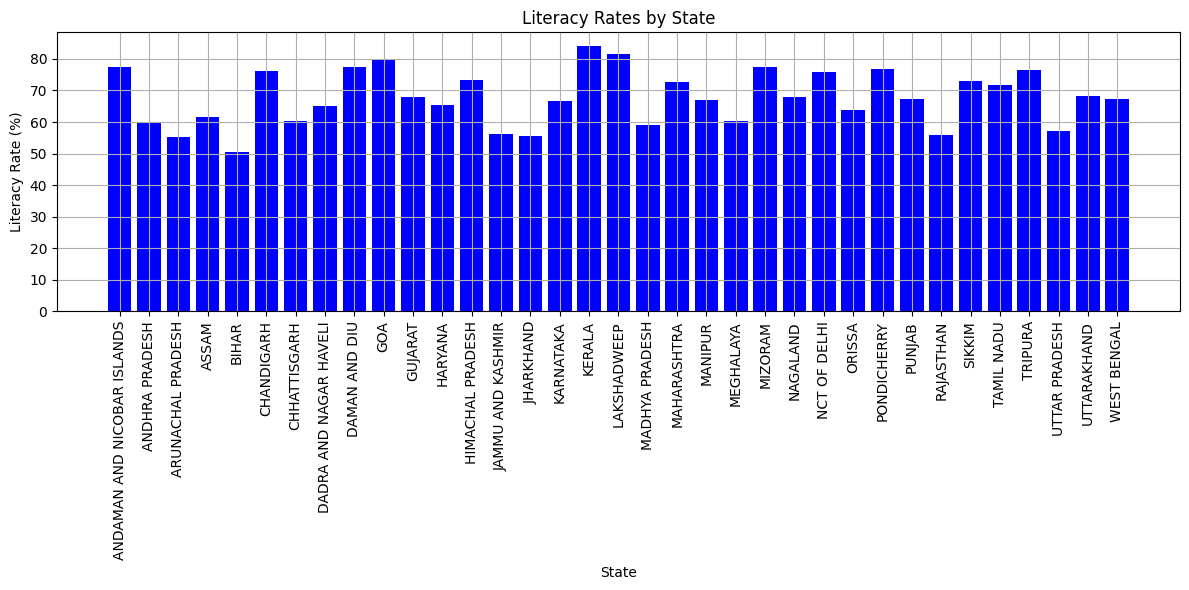

In [9]:
import matplotlib.pyplot as plt

# List of state names and their literacy rates
data = [('ANDAMAN AND NICOBAR ISLANDS', 77.32414387475991), ('ANDHRA PRADESH', 59.77334542575791),
        ('ARUNACHAL PRADESH', 55.35810170647822), ('ASSAM', 61.45689155040753), ('BIHAR', 50.43691584466746),
        ('CHANDIGARH', 76.31228385996495), ('CHHATTISGARH', 60.20670499402666),
        ('DADRA AND NAGAR HAVELI', 64.94738281511395), ('DAMAN AND DIU', 77.45460375667531),
        ('GOA', 79.9075105670377), ('GUJARAT', 67.99068069374013), ('HARYANA', 65.47546646422207),
        ('HIMACHAL PRADESH', 73.41628837330991), ('JAMMU AND KASHMIR', 56.351669069128555),
        ('JHARKHAND', 55.55958090869887), ('KARNATAKA', 66.5310162908284), ('KERALA', 84.2237101824127),
        ('LAKSHADWEEP', 81.51164053169543), ('MADHYA PRADESH', 59.00186114469107),
        ('MAHARASHTRA', 72.5737700262924), ('MANIPUR', 66.8282095977511), ('MEGHALAYA', 60.16419893025995),
        ('MIZORAM', 77.30316822912015), ('NAGALAND', 67.85103072930934), ('NCT OF DELHI', 75.87450420513153),
        ('ORISSA', 63.71195527692738), ('PONDICHERRY', 76.71034085418282), ('PUNJAB', 67.42929419668246),
        ('RAJASTHAN', 55.8368413272501), ('SIKKIM', 72.8740191654779), ('TAMIL NADU', 71.84981419193555),
        ('TRIPURA', 76.34312370148808), ('UTTAR PRADESH', 57.252497231890196), ('UTTARAKHAND', 68.22083873835896),
        ('WEST BENGAL', 67.41991702867722)]

# Split the data into state names and literacy rates
state_names, literacy_rates = zip(*data)

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(state_names, literacy_rates, color='blue')
plt.xlabel('State')
plt.ylabel('Literacy Rate (%)')
plt.title('Literacy Rates by State')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(True)

plt.tight_layout()  # Ensures the labels fit in the plot area
plt.show()  # Display the plot
